<a href="https://colab.research.google.com/github/Liesje123/ia/blob/main/TP4_M2_IA_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP N°4 - Réseaux de neurones

## Tensorflow et Keras

### Installation de _Tensorflow_

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# vérification de la bonne importation de tensorflow :
## est-ce qu'elle est bien installé ? = > oui, v : 2.15.0
print(tf.__version__)
## est-ce qu'elle fonctionne correctement ? => oui, tf.Tensor(-0.17419434, shape=(), dtype=float32)
print(tf.reduce_sum(tf.random.normal([1000,  1000])))
## est-ce qu'elle est capable d'utiliser le GPU? = > non, []
print(tf.config.list_physical_devices('GPU'))

2.15.0
tf.Tensor(-387.7232, shape=(), dtype=float32)
[]


### Chargement des données

In [ ]:
# Chargement du jeu de données MNIST
(xTrain, yTrain), (xTest, yTest) = tf.keras.datasets.mnist.load_data()

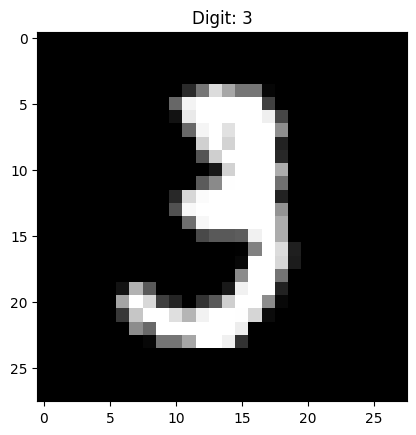

In [ ]:
# print(yTrain[10])
plt.imshow(xTrain[10], cmap='gray')
plt.title("Digit: {}".format(yTrain[10]))
plt.show()

### Normalisation des données

In [ ]:
# Normalise le jeu de données
print(xTrain.shape)
print(xTest.shape)

xTrain = xTrain.reshape(xTrain.shape[0], xTrain.shape[1]*xTrain.shape[2])
xTest = xTest.reshape(xTest.shape[0], xTest.shape[1]*xTest.shape[2])

xTrain = xTrain/255
xTest = xTest/255

print(xTrain.shape)


En entrée de la normalisation : 60000 données de tailles 28*28 et en sortie 60000 données de taille 784

In [ ]:
# # Normalise le jeu de données - label
# print(yTrain.shape)
# nbClasses = 10
# yTrain = tf.keras.utils.to_categorical(yTrain, nbClasses)
# yTest = tf.keras.utils.to_categorical(yTest, nbClasses)
# print(yTrain.shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


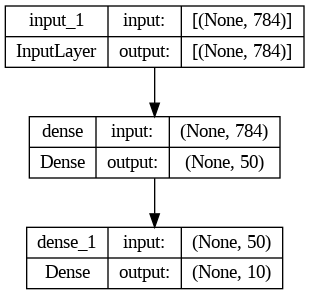

In [ ]:
# Définition du réseau neuronal

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape = (xTrain.shape[1],)))
model.add(tf.keras.layers.Dense(50, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Setup and learn model V1
optimize = tf.keras.optimizers.experimental.SGD(learning_rate=0.1)
model.compile(optimizer=optimize, loss='mse', metrics=['accuracy'])
history = model.fit(xTrain, yTrain, batch_size=100, epochs=100)

Epoch 1/100
600/600 [==============================] - 7s 10ms/step - loss: 20.3324 - accuracy: 0.0713
Epoch 2/100
600/600 [==============================] - 7s 12ms/step - loss: 20.2806 - accuracy: 0.0629
Epoch 3/100
600/600 [==============================] - 6s 10ms/step - loss: 20.2791 - accuracy: 0.0614
Epoch 4/100
600/600 [==============================] - 6s 9ms/step - loss: 20.2787 - accuracy: 0.0607
Epoch 5/100
600/600 [==============================] - 5s 8ms/step - loss: 20.2784 - accuracy: 0.0602
Epoch 6/100
600/600 [==============================] - 4s 7ms/step - loss: 20.2782 - accuracy: 0.0605
Epoch 7/100
600/600 [==============================] - 2s 4ms/step - loss: 20.2780 - accuracy: 0.0602
Epoch 8/100
600/600 [==============================] - 2s 3ms/step - loss: 20.2779 - accuracy: 0.0601
Epoch 9/100
600/600 [==============================] - 2s 3ms/step - loss: 20.2779 - accuracy: 0.0602
Epoch 10/100
600/600 [==============================] - 2s 3ms/step - loss: 20.

In [ ]:
# Setup and learn model V2
# doit mettre labels en commentaire
optimize = tf.keras.optimizers.experimental.SGD(learning_rate=0.1)
model.compile(optimizer=optimize, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xTrain, yTrain, batch_size=100, epochs=100)

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 1.2088 - accuracy: 0.7044
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4648 - accuracy: 0.8836
Epoch 3/100
600/600 [==============================] - 2s 4ms/step - loss: 0.3620 - accuracy: 0.9022
Epoch 4/100
600/600 [==============================] - 2s 4ms/step - loss: 0.3202 - accuracy: 0.9105
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2949 - accuracy: 0.9167
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2765 - accuracy: 0.9221
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2620 - accuracy: 0.9259
Epoch 8/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2494 - accuracy: 0.9294
Epoch 9/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2385 - accuracy: 0.9317
Epoch 10/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2288 - accura

In [ ]:
# Setup and learn model V3
optimize = tf.keras.optimizers.experimental.SGD(learning_rate=0.1)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xTrain, yTrain, batch_size=100, epochs=100)

Epoch 1/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0619 - accuracy: 0.9823
Epoch 2/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0574 - accuracy: 0.9839
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0539 - accuracy: 0.9850
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0506 - accuracy: 0.9867
Epoch 5/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0480 - accuracy: 0.9873
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0453 - accuracy: 0.9886
Epoch 7/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0434 - accuracy: 0.9888
Epoch 8/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0409 - accuracy: 0.9903
Epoch 9/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0387 - accuracy: 0.9907
Epoch 10/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0367 - accura

In [ ]:
# V4
# doit mettre les reshape en commentaire

# initialisation
(xTrain, yTrain), (xTest, yTest) = tf.keras.datasets.mnist.load_data()
xTrain = xTrain/255
xTest = xTest/255

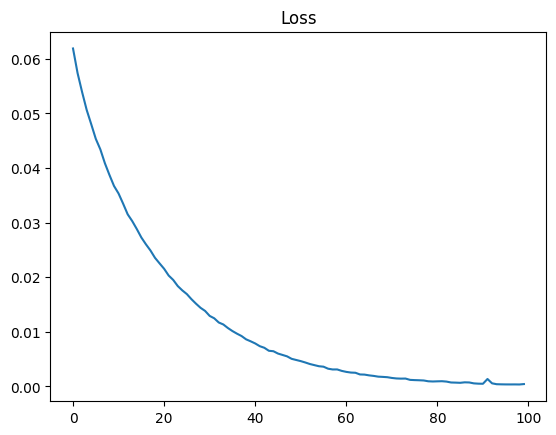

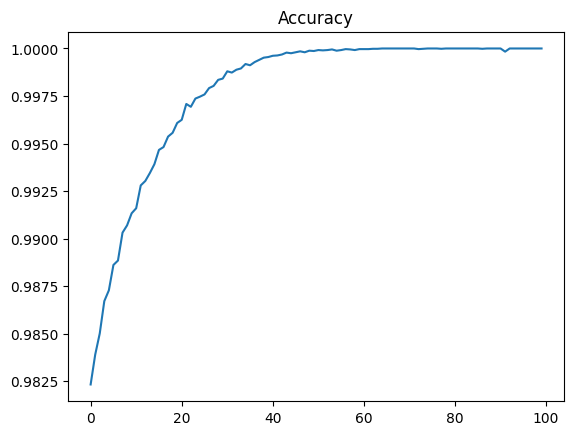

In [ ]:
# Display metrics
plt.figure()
plt.title('Loss')
plt.plot(history.history['loss'])
plt.figure()
plt.title('Accuracy')
plt.plot(history.history['accuracy'])

In [ ]:
metrics = model.evaluate(xTest, yTest)
print('MSE : '+str(metrics[0]))
print('Accucracy : '+str(100*metrics[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.1628 - accuracy: 0.9692
MSE : 0.16278542578220367
Accucracy : 96.92000150680542


In [ ]:
# # Define neural network
# model = tf.keras.models.Sequential()

# #model.add(tf.keras.layers.InputLayer(input_shape=(xTrain[1],)))
# model.add(tf.keras.layers.Flattent(input_shape=(xTrain.shape[1],xTrain.shape[2])))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))
# model.summary()
# tf.keras.utils.plot_model(model, show_shapes=True)

# Partie 9

In [ ]:
# initialisation
(xTrain, yTrain), (xTest, yTest) = tf.keras.datasets.mnist.load_data()
xTrain = xTrain/255
xTest = xTest/255

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 10)              

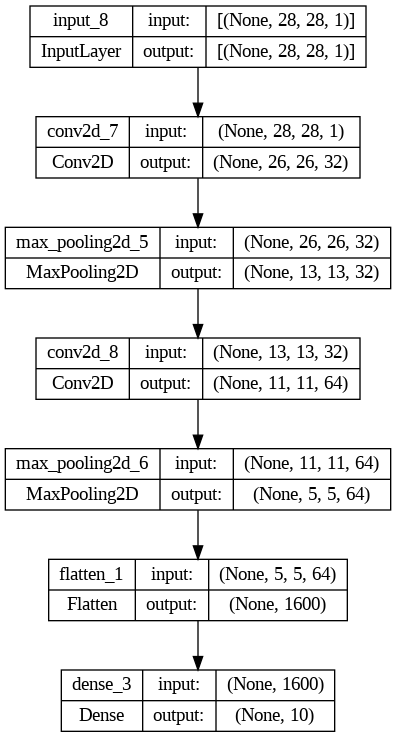

In [ ]:
# Partie 9 :
# Define neural network
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(xTrain.shape[1],xTrain.shape[2],1)))
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu' ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu' ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Display filters
filters, _ = model.layers[0].get_weigths()
_, axis = plt.subplots(8,4)
k = 0
for i in range (0,8):
  for j in range (0,4):
    axis[i,j].imshow(filters[:, :, :,k].reshape(3,3),cmap='gray')
    k+=1

AttributeError: 'Conv2D' object has no attribute 'get_weigths'

1/1 [==============================] - 0s 83ms/step


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

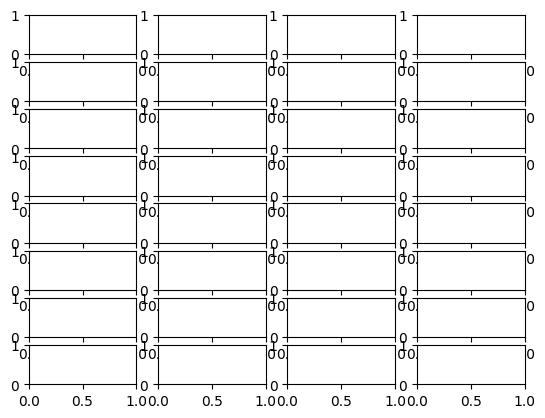

In [ ]:
# Display feature map
featuresMapsModel = tf.keras.models.Model(inputs=model.inputs,
                                          outputs=model.outputs)
x=xTrain[100].reshape(1,28,28,1)
featuresMaps = featuresMapsModel.predict(x)
_,axis = plt.subplots(8,4)
k = 0
for i in range (0,8):
  for j in range (0,4):
    axis[i,j].imshow(featuresMaps[:, :, :,k].reshape(26,26),cmap='gray')
    k+=1